In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sb

#Load Data

In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/Exercise-CarData.csv')
print("Data: \n", dataset)
print("Data Statistics: \n", dataset.describe())

Data: 
       Unnamed: 0  Price   Age     KM  ... Automatic    CC  Doors  Weight
0              0  13500  23.0  46986  ...         0  2000  three    1165
1              1  13750  23.0  72937  ...         0  2000      3    1165
2              2  13950  24.0  41711  ...         0  2000      3    1165
3              3  14950  26.0  48000  ...         0  2000      3    1165
4              4  13750  30.0  38500  ...         0  2000      3    1170
...          ...    ...   ...    ...  ...       ...   ...    ...     ...
1431        1431   7500   NaN  20544  ...         0  1300      3    1025
1432        1432  10845  72.0     ??  ...         0  1300      3    1015
1433        1433   8500   NaN  17016  ...         0  1300      3    1015
1434        1434   7250  70.0     ??  ...         0  1300      3    1015
1435        1435   6950  76.0      1  ...         0  1600      5    1114

[1436 rows x 11 columns]
Data Statistics: 
         Unnamed: 0         Price  ...           CC      Weight
count  1

# Applying Label encoder to convert string to numbers

In [ ]:
dataset['KM'].replace('??', np.NaN, inplace=True)
dataset['HP'].replace('????',np.NaN, inplace=True)
dataset['Doors'].replace('three','3',inplace=True)
dataset['Doors'].replace('four','4',inplace=True)
dataset['Doors'].replace('five','5',inplace=True)

In [ ]:
new_X= dataset.iloc[:,1:-1].values
new_Y= dataset.iloc[:, -1].values

#FuelType
new_X[:,3]=new_X[:,3].astype('str')

le= LabelEncoder()
new_X[:, 3]= le.fit_transform(new_X[:, 3])

print(new_X[:,3])

[1 1 1 ... 2 3 2]


# Handling Null Values

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1421 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1430 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB
None


In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
mode_imputer = SimpleImputer(missing_values = np.nan,strategy = "most_frequent")

# Fitting the data, function learns the stats 
the_imputer = imputer.fit(new_X[:, 0:3])

# fit_transform() will execute those stats on the input ie. X[:, 1:3] 
new_X[:, 0:3] = the_imputer.transform(new_X[:, 0:3])

# Fitting the data, function learns the stats 
the_mode_imputer = mode_imputer.fit(new_X[:, 3:4])   
new_X[:, 3:4] = the_mode_imputer.transform(new_X[:, 3:4])

# Fitting the data, function learns the stats 
the_imputer = imputer.fit(new_X[:, 4:5])
new_X[:, 4:5] = the_imputer.transform(new_X[:, 4:5])

# Fitting the data, function learns the stats 
the_mode_imputer = mode_imputer.fit(new_X[:, 5:6])   
new_X[:, 5:6] = the_mode_imputer.transform(new_X[:, 5:6])

# filling the missing value with mean 
print("\nNew Input After Imputation : \n\n", new_X)


New Input After Imputation : 

 [[13500.0 23.0 46986.0 ... 0 2000 '3']
 [13750.0 23.0 72937.0 ... 0 2000 '3']
 [13950.0 24.0 41711.0 ... 0 2000 '3']
 ...
 [8500.0 55.67215568862275 17016.0 ... 0 1300 '3']
 [7250.0 70.0 68647.23997185081 ... 0 1300 '3']
 [6950.0 76.0 1.0 ... 0 1600 '5']]


In [ ]:
new_dataset = pd.DataFrame(new_X,columns=dataset.columns[1:-1])
new_dataset = new_dataset.astype(float)
new_dataset.dtypes

Price        float64
Age          float64
KM           float64
FuelType     float64
HP           float64
MetColor     float64
Automatic    float64
CC           float64
Doors        float64
dtype: object

# Feature Selection

             Price       Age        KM  ...  Automatic        CC     Doors
Price     1.000000 -0.845111 -0.565016  ...   0.033081  0.165067  0.185326
Age      -0.845111  1.000000  0.495199  ...   0.030931 -0.116255 -0.151785
KM       -0.565016  0.495199  1.000000  ...  -0.080743  0.296281 -0.036021
FuelType  0.022730  0.033599 -0.356238  ...   0.073860 -0.499114 -0.018434
HP        0.308414 -0.152946 -0.332984  ...   0.013753  0.053466  0.096938

[5 rows x 9 columns]


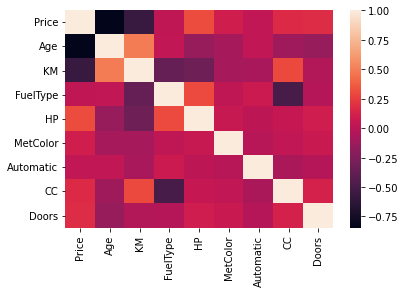

In [ ]:
corr = new_dataset.corr()
print(corr.head())
sb.heatmap(corr)

In [ ]:
columns = np.full((len(new_dataset.columns),), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = new_dataset.columns[columns]
selected_columns.shape
print("Selected Columns :- \n\n",selected_columns)

new_dataset = new_dataset[selected_columns]
print("\n\nNew Data :- \n\n",new_dataset)

Selected Columns :- 

 Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors'],
      dtype='object')


New Data :- 

         Price        Age            KM  ...  Automatic      CC  Doors
0     13500.0  23.000000  46986.000000  ...        0.0  2000.0    3.0
1     13750.0  23.000000  72937.000000  ...        0.0  2000.0    3.0
2     13950.0  24.000000  41711.000000  ...        0.0  2000.0    3.0
3     14950.0  26.000000  48000.000000  ...        0.0  2000.0    3.0
4     13750.0  30.000000  38500.000000  ...        0.0  2000.0    3.0
...       ...        ...           ...  ...        ...     ...    ...
1431   7500.0  55.672156  20544.000000  ...        0.0  1300.0    3.0
1432  10845.0  72.000000  68647.239972  ...        0.0  1300.0    3.0
1433   8500.0  55.672156  17016.000000  ...        0.0  1300.0    3.0
1434   7250.0  70.000000  68647.239972  ...        0.0  1300.0    3.0
1435   6950.0  76.000000      1.000000  ...        0.0  1600.0    5.0

[1

# Data Transformation

In [ ]:
new_X = new_dataset.iloc[:, :-1].values
scaler = MinMaxScaler()
std = StandardScaler()
new_X[:,0:3] = std.fit_transform(scaler.fit_transform(new_X[:,0:3]))
new_X[:,4:5] = std.fit_transform(scaler.fit_transform(new_X[:,4:5]))
new_X[:,7:9] = std.fit_transform(scaler.fit_transform(new_X[:,7:9]))
print("Dataset after preprocessing\n\n",new_dataset)

Dataset after preprocessing

          Price           Age        KM  ...  Automatic        CC  Doors
0     0.763763 -1.822802e+00 -0.583476  ...        0.0  2.314976    3.0
1     0.832715 -1.822802e+00  0.115551  ...        0.0  2.314976    3.0
2     0.887877 -1.767012e+00 -0.725566  ...        0.0  2.314976    3.0
3     1.163685 -1.655430e+00 -0.556163  ...        0.0  2.314976    3.0
4     0.832715 -1.432267e+00 -0.812059  ...        0.0  2.314976    3.0
...        ...           ...       ...  ...        ...       ...    ...
1431 -0.891089 -4.893269e-16 -1.295729  ...        0.0 -1.425994    3.0
1432  0.031491  9.109418e-01  0.000000  ...        0.0 -1.425994    3.0
1433 -0.615281 -4.893269e-16 -1.390761  ...        0.0 -1.425994    3.0
1434 -0.960042  7.993604e-01  0.000000  ...        0.0 -1.425994    3.0
1435 -1.042784  1.134105e+00 -1.849084  ...        0.0  0.177279    5.0

[1436 rows x 9 columns]
